# Importing Library

In [99]:
import numpy as np
import pandas as pd
import pickle as pkl

## Importing Data

In [100]:
file = 'hamspam.tsv'
csv_file = pd.read_table(file,delimiter='\t')

<h2> Converting Into CSV</h2>
<p> Converting hamspam.tsv data to hamspam.csv data in readable form and to perform operations<p>

In [101]:
csv_file = csv_file.to_csv('hamspam.csv')

In [102]:
data = pd.read_csv('hamspam.csv',index_col='Unnamed: 0')

In [103]:
data.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [104]:
data.columns = ['Label','News']

In [105]:
data.head()

,Label,News
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


<h2>Exploring Data</h2>
<p>Exploring Data and Getting Information About Data By Applying Some Pandas Inbuilt Function To get Information About this Dataset</p>

In [106]:
data.head()

,Label,News
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 5566
Data columns (total 2 columns):
Label    5567 non-null object
News     5567 non-null object
dtypes: object(2)
memory usage: 130.5+ KB


<h1>Resetting Column Names Of Data</h1>

In [108]:
# Changing Column Labels
data.columns = ['Label','News']

In [109]:
data.head()

,Label,News
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [110]:
data.describe()

,Label,News
count,5567,5567
unique,2,5164
top,ham,"Sorry, I'll call later"
freq,4821,30


In [111]:
type(data)

pandas.core.frame.DataFrame

In [112]:
data.shape

(5567, 2)

In [113]:
data.columns

Index(['Label', 'News'], dtype='object')

In [114]:
type(data.columns)

pandas.core.indexes.base.Index

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 5566
Data columns (total 2 columns):
Label    5567 non-null object
News     5567 non-null object
dtypes: object(2)
memory usage: 130.5+ KB


In [116]:
# Adding Extra Cloumn To Data to get news in true or false True for ham and false for spam
data['boolean_label'] = data.Label=='ham'

In [117]:
data.head()

,Label,News,boolean_label
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False
1,ham,"Nah I don't think he goes to usf, he lives aro...",True
2,ham,Even my brother is not like to speak with me. ...,True
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,True
4,ham,As per your request 'Melle Melle (Oru Minnamin...,True


In [118]:
data['Label'].describe()

count     5567
unique       2
top        ham
freq      4821
Name: Label, dtype: object

<h2>Data Munging For Ham And Spam And Analysis Of Data</h1>

In [119]:
#ham data got seprated from hamspam dataset and analysis
ham = data[data['Label'] == "ham"]

In [120]:
ham.head()

,Label,News,boolean_label
1,ham,"Nah I don't think he goes to usf, he lives aro...",True
2,ham,Even my brother is not like to speak with me. ...,True
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,True
4,ham,As per your request 'Melle Melle (Oru Minnamin...,True
7,ham,I'm gonna be home soon and i don't want to tal...,True


In [121]:
ham.describe()

,Label,News,boolean_label
count,4821,4821,4821
unique,1,4512,1
top,ham,"Sorry, I'll call later",True
freq,4821,30,4821


In [122]:
#spam data got seprated from hamspam dataset and analysis
spam = data[data['Label']=='spam']

In [123]:
spam.describe()

,Label,News,boolean_label
count,746,746,746
unique,1,652,1
top,spam,Please call our customer service representativ...,False
freq,746,4,746


In [124]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 5562
Data columns (total 3 columns):
Label            746 non-null object
News             746 non-null object
boolean_label    746 non-null bool
dtypes: bool(1), object(2)
memory usage: 18.2+ KB


<h1>Preprocessing Our Data To Create A Classifire</h1>


In [125]:
#preprocessing Our Data to make a classifire
from sklearn.model_selection import train_test_split
df = data[:]

<h2>Spliting Training And Test Dataset</h1>

In [126]:
#extracting label from dataset
y = df['Label']

In [127]:
#droping Label column from dataset
df=df.drop('Label',axis=1)

In [128]:
#droping Boolean_label column from dataset
df=df.drop('boolean_label',axis=1)

In [129]:
df.head()

,News
0,Free entry in 2 a wkly comp to win FA Cup fina...
1,"Nah I don't think he goes to usf, he lives aro..."
2,Even my brother is not like to speak with me. ...
3,I HAVE A DATE ON SUNDAY WITH WILL!!
4,As per your request 'Melle Melle (Oru Minnamin...


In [130]:
X = df['News']

In [131]:
#spliting Our data into training and testing to create a classifier
X_train, X_test, y_train, y_test = train_test_split(df['News'],y,test_size=0.33,random_state=53)

<h1>Setting X_train And X_test into CountVectorizer Object</h1>

In [132]:
X_train.shape

(3729,)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [134]:
print(count_train.shape)

(3729, 6867)


<h1>Setting X_train And X_test into TfIdfVectorizer Object</h1>

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

<h2> Getting Feature Names For count_vectorizer and tfidf_vectorizer</h2>

In [136]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['zac', 'zaher', 'zealand', 'zebra', 'zed', 'zhong', 'zoe', 'zouk', 'ú1', '〨ud']
['00', '000', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207']


<h3>Checking Difference Between count_train and tfidf_train Dataset</h3>

In [137]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
#count_df.head()
#tfidf_df.head()

set()

<h1>Function For Ploting Confusion Matrix For Different Classifires </h1>

In [138]:
#function Copied from Scikit Learn Confusion matrix Web Link
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h1>Result of Test Dataset With Different Classification Algorithms and Analysis Of Those</h1>

<h2> Naive Bayes Algorithm for Classification Analysis</h2>

accuracy:   0.982
Confusion matrix, without normalization


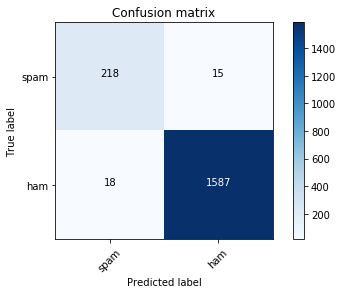

In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
clf = MultinomialNB(alpha=0.5)
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

<h2> Logistic Regression Algorithm for Classification Analysis</h2>

In [140]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [141]:
clf.fit(count_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
log_pred=clf.predict(count_test)

0.9836779107725789
Confusion matrix, without normalization


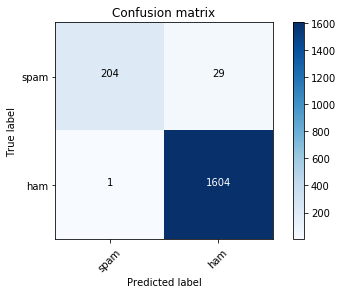

In [143]:
print(metrics.accuracy_score(y_test,log_pred))
cm = metrics.confusion_matrix(y_test, log_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [192]:
p=count_vectorizer.transform(["you won 1 million pounds."])

In [193]:
clf.predict(p)

array(['ham'], dtype=object)

<h2> Decision Tree Algorithm for Classification Analysis</h2>

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [146]:
dt_clf.fit(tfidf_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
dt_pred = dt_clf.predict(tfidf_test)

0.9651795429815017
Confusion matrix, without normalization


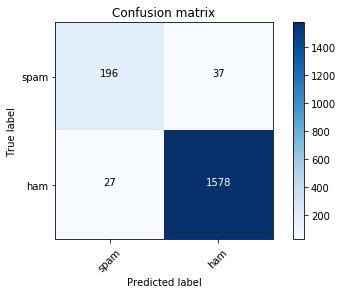

In [188]:
print(metrics.accuracy_score(y_test,dt_pred))
cm = metrics.confusion_matrix(y_test, dt_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

<h2> KNeighbors Algorithm for Classification Analysis</h2>

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [151]:
knn_clf.fit(tfidf_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
knn_pred=knn_clf.predict(tfidf_test)

Confusion matrix, without normalization


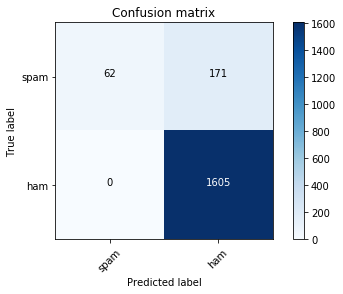

In [153]:
k=metrics.accuracy_score(y_test,knn_pred)
cm = metrics.confusion_matrix(y_test, knn_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [154]:
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC

<h2> Passive Agrassive Algorithm for Classification Analysis</h2>

C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9874863982589771
Confusion matrix, without normalization


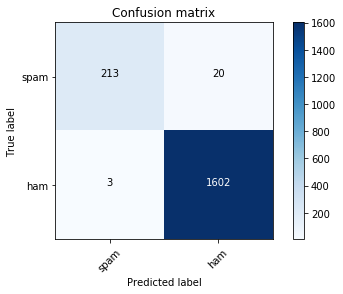

In [155]:
pas_clf = PassiveAggressiveClassifier()
pas_clf.fit(tfidf_train,y_train)
pas_pred=pas_clf.predict(tfidf_test)
print(metrics.accuracy_score(y_test,pas_pred))
cm = metrics.confusion_matrix(y_test, pas_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

<h2> LinearSVC Algorithm for Classification Analysis</h2>

0.9874863982589771
Confusion matrix, without normalization


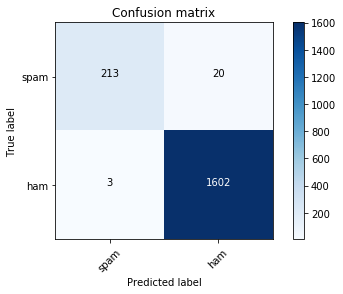

In [156]:
svc_clf = LinearSVC()
svc_clf.fit(tfidf_train,y_train)
svc_pred=pas_clf.predict(tfidf_test)
print(metrics.accuracy_score(y_test,svc_pred))
cm = metrics.confusion_matrix(y_test, svc_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

<h2> SGD Algorithm for Classification Analysis</h2>

C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.985854189336235
Confusion matrix, without normalization


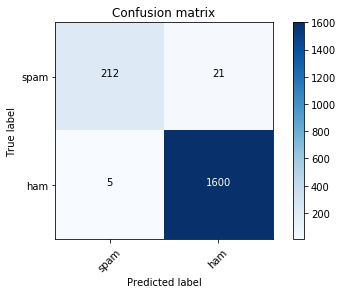

In [157]:
sdg_clf = SGDClassifier()
sdg_clf.fit(tfidf_train,y_train)
sdg_pred = sdg_clf.predict(tfidf_test)
print(metrics.accuracy_score(y_test,sdg_pred))
cm = metrics.confusion_matrix(y_test, sdg_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [158]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

<h2> RandomForest Algorithm for Classification Analysis</h2>

0.9733405875952121
Confusion matrix, without normalization


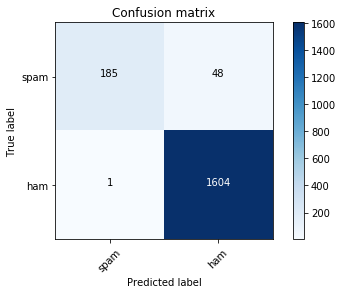

In [159]:
rndm_clf=RandomForestClassifier()
rndm_clf.fit(tfidf_train,y_train)
rndm_pred=rndm_clf.predict(tfidf_test)
print(metrics.accuracy_score(y_test,rndm_pred))
cm = metrics.confusion_matrix(y_test, rndm_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

<h2> Adaboost Algorithm for Classification Analysis</h2>

0.9635473340587595
Confusion matrix, without normalization


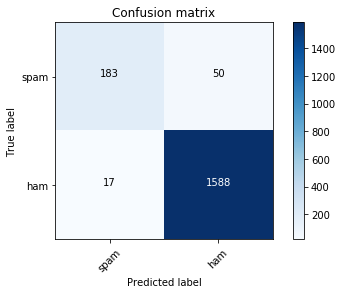

In [160]:
ada_clf=AdaBoostClassifier()
ada_clf.fit(tfidf_train,y_train)
ada_pred=ada_clf.predict(tfidf_test)
print(metrics.accuracy_score(y_test,ada_pred))
cm = metrics.confusion_matrix(y_test, ada_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [161]:
from sklearn.svm import SVC

0.8732317736670294
Confusion matrix, without normalization


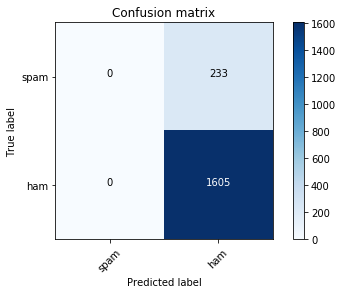

In [162]:
svc=SVC()
svc.fit(tfidf_train,y_train)
svc_pred=svc.predict(tfidf_test)
print(metrics.accuracy_score(y_test,svc_pred))
cm = metrics.confusion_matrix(y_test, svc_pred, labels=['spam', 'ham'])
plot_confusion_matrix(cm, classes=['spam', 'ham'])

In [163]:
classifires = [RandomForestClassifier(), AdaBoostClassifier(),PassiveAggressiveClassifier(), SGDClassifier(),
               LinearSVC(),MultinomialNB(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
name=['RandomForest', 'AdaBoost','PassiveAggressive', 'SGD',
               'LinearSVC','MultinomialNB','LogisticRegression','KNeighbors','DecisionTree']
result = {}
accuracy_score = {}

<h1>All Classifires Accuracy Score And Result For CountVectorizer Test Set</h1>

In [164]:
import numpy as np
import itertools
for classifire,nm in zip(classifires,name):
    print("Analysis of Countvectorizer: "+nm)
    clf = classifire
    clf.fit(count_train, y_train)
    pred = clf.predict(count_test)
    result[nm]=pred
    score = metrics.accuracy_score(y_test, pred)
    accuracy_score[nm]=score
    print("accuracy:   %0.3f" % score)

Analysis of Countvectorizer: RandomForest
accuracy:   0.978
Analysis of Countvectorizer: AdaBoost
accuracy:   0.964
Analysis of Countvectorizer: PassiveAggressive
accuracy:   0.987
Analysis of Countvectorizer: SGD
accuracy:   0.985
Analysis of Countvectorizer: LinearSVC
accuracy:   0.986
Analysis of Countvectorizer: MultinomialNB
accuracy:   0.985
Analysis of Countvectorizer: LogisticRegression
accuracy:   0.984
Analysis of Countvectorizer: KNeighbors


C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:   0.911
Analysis of Countvectorizer: DecisionTree
accuracy:   0.970


In [165]:
result_tfidf={}
accuracy_score_tfidf={}

<h1>All Classifires Accuracy Score And Result For TfidfVectorizer Test Set</h1>

In [166]:
for classifire,nm in zip(classifires,name):
    print("Analysis of TfidfVector: "+nm)
    clf = classifire
    clf.fit(tfidf_train, y_train)
    pred = clf.predict(tfidf_test)
    result_tfidf[nm]=pred
    score = metrics.accuracy_score(y_test, pred)
    accuracy_score_tfidf[nm]=score
    print("accuracy Score:   %0.3f" % score)

Analysis of TfidfVector: RandomForest
accuracy Score:   0.972
Analysis of TfidfVector: AdaBoost
accuracy Score:   0.964
Analysis of TfidfVector: PassiveAggressive
accuracy Score:   0.987
Analysis of TfidfVector: SGD
accuracy Score:   0.986
Analysis of TfidfVector: LinearSVC
accuracy Score:   0.984
Analysis of TfidfVector: MultinomialNB
accuracy Score:   0.975
Analysis of TfidfVector: LogisticRegression
accuracy Score:   0.960
Analysis of TfidfVector: KNeighbors


C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Desktop\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy Score:   0.907
Analysis of TfidfVector: DecisionTree
accuracy Score:   0.964


In [167]:
print('Best Classifire Model for CountVector is {} with Accuracy Score Of: {}'.format(list(accuracy_score.keys())[list(accuracy_score.values()).index(max(accuracy_score.values()))],max(accuracy_score.values())))

Best Classifire Model for CountVector is PassiveAggressive with Accuracy Score Of: 0.9869423286180631


In [168]:
print('Best Classifire Model for TfidfVector is {} with Accuracy Score Of: {}'.format(list(accuracy_score_tfidf.keys())[list(accuracy_score_tfidf.values()).index(max(accuracy_score_tfidf.values()))],max(accuracy_score_tfidf.values())))

Best Classifire Model for TfidfVector is PassiveAggressive with Accuracy Score Of: 0.9869423286180631


In [169]:
for nm in name:
    if accuracy_score[nm]>accuracy_score_tfidf[nm]:
        print('{} classifire is best for CountVectorization With Score of: {}'.format(nm,accuracy_score[nm]))
    elif accuracy_score[nm]<accuracy_score_tfidf[nm]:
        print('{} classifire is best for TfIdfVectorization With Score of: {}'.format(nm,accuracy_score_tfidf[nm]))

RandomForest classifire is best for CountVectorization With Score of: 0.9776931447225244
AdaBoost classifire is best for CountVectorization With Score of: 0.9640914036996736
SGD classifire is best for TfIdfVectorization With Score of: 0.9863982589771491
LinearSVC classifire is best for CountVectorization With Score of: 0.985854189336235
MultinomialNB classifire is best for CountVectorization With Score of: 0.984766050054407
LogisticRegression classifire is best for CountVectorization With Score of: 0.9836779107725789
KNeighbors classifire is best for CountVectorization With Score of: 0.9107725788900979
DecisionTree classifire is best for CountVectorization With Score of: 0.969532100108814


In [170]:
x = ['Hello World','Hello Python Bootcamp','What Is Awesome Python' ]

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

In [172]:
count = CountVectorizer(stop_words='english')

In [173]:
cnt = count.fit_transform(x)

In [174]:
cnt.toarray()

array([[0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0],
       [1, 0, 0, 1, 0]], dtype=int64)

In [175]:
count.get_feature_names()

['awesome', 'bootcamp', 'hello', 'python', 'world']

In [176]:
y=count.transform(['What A python Like very'])

In [177]:
y.toarray()

array([[0, 0, 0, 1, 0]], dtype=int64)

In [181]:
p=count.transform(["you won"])

In [182]:
print(p)